# Table of Contents

* [Section 1](#Section-one)
     * [Section (1.a)](#subsection-one-of-section-1)
     * [Section (1.b)](#subsection-two-of-section-1)
* [Section 2](#Section-two)
     * [Section (2.a)](#subsection-one-of-section-2)
```

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

from fastai.text.all import *
import torch

from pathlib import Path 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


In [2]:
#import zipfile,kaggle
# if iskaggle:
path = Path('../input/ecommerce-text-classification')
! pip install -q datasets

# 1) Import Data

In [3]:
column_headers = ['target','item_description']
df = pd.read_csv(path/'ecommerceDataset.csv', names=column_headers)
print(df.shape)
df.head()

(50425, 2)


target  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          item_description  
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...  
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).  
2  SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quit...  
3  SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract a...  
4  Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Wi...

# 2) Preprocessing

In [4]:
"""
    Identify dupes
"""

dupes = df.duplicated()
dupe_df = df[dupes]
print(dupe_df.shape)
print(dupe_df.target.value_counts())

(22622, 2)
target
Household                 8749
Books                     5564
Electronics               5313
Clothing & Accessories    2996
Name: count, dtype: int64


In [5]:
"""
    drop dupes
"""

df = df.drop_duplicates()
print(df.shape)
df.head()

(27803, 2)


target  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          item_description  
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...  
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).  
2  SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quit...  
3  SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract a...  
4  Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Wi...

In [6]:
# Show nulls
print(df.isna().sum())

null_rows = df[df.isnull().any(axis=1)]
null_rows

target              0
item_description    1
dtype: int64


target item_description
39330  Clothing & Accessories              NaN

In [7]:
# drop 1 null row
df = df.dropna()

In [8]:
# Rename column
df = df.rename(columns={'target': 'labels'})

# Reorder cols
col_order = ['item_description', 'labels']
df = df[col_order]
df.head()

item_description  \
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...   
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).   
2  SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quit...   
3  SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract a...   
4  Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Wi...   

      labels  
0  Household  
1  Household  
2  Household  
3  Household  
4  Household

# 3) EDA

In [9]:
"""
    Break down each label
        - Electronics into gaming vs. computer vs. hardware
        - Household into garden vs. kitchen vs. living room
        - Books into author vs. genre
        - Clothing & Accessories into shoes vs. belts vs. shirts
"""

label_counts = df.labels.value_counts()
label_counts

labels
Household                 10564
Books                      6256
Clothing & Accessories     5674
Electronics                5308
Name: count, dtype: int64

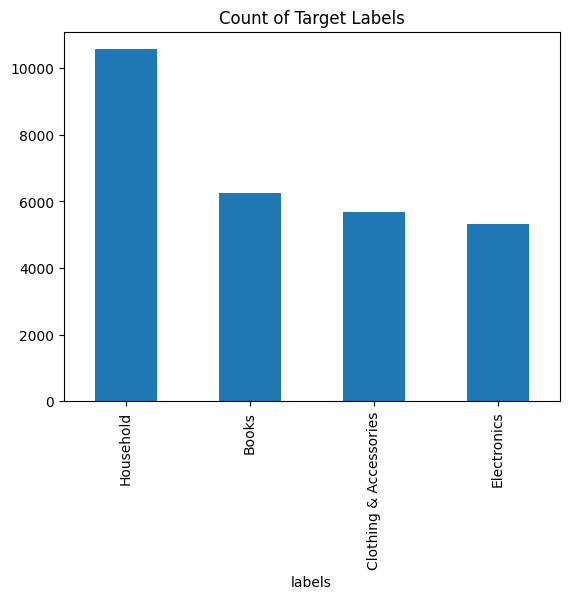

In [10]:
label_counts.plot(kind='bar')
plt.title('Count of Target Labels')
plt.show()

Now lets calculate the length of each 'item_description' and see how the distribution of lengths vary between each unique label

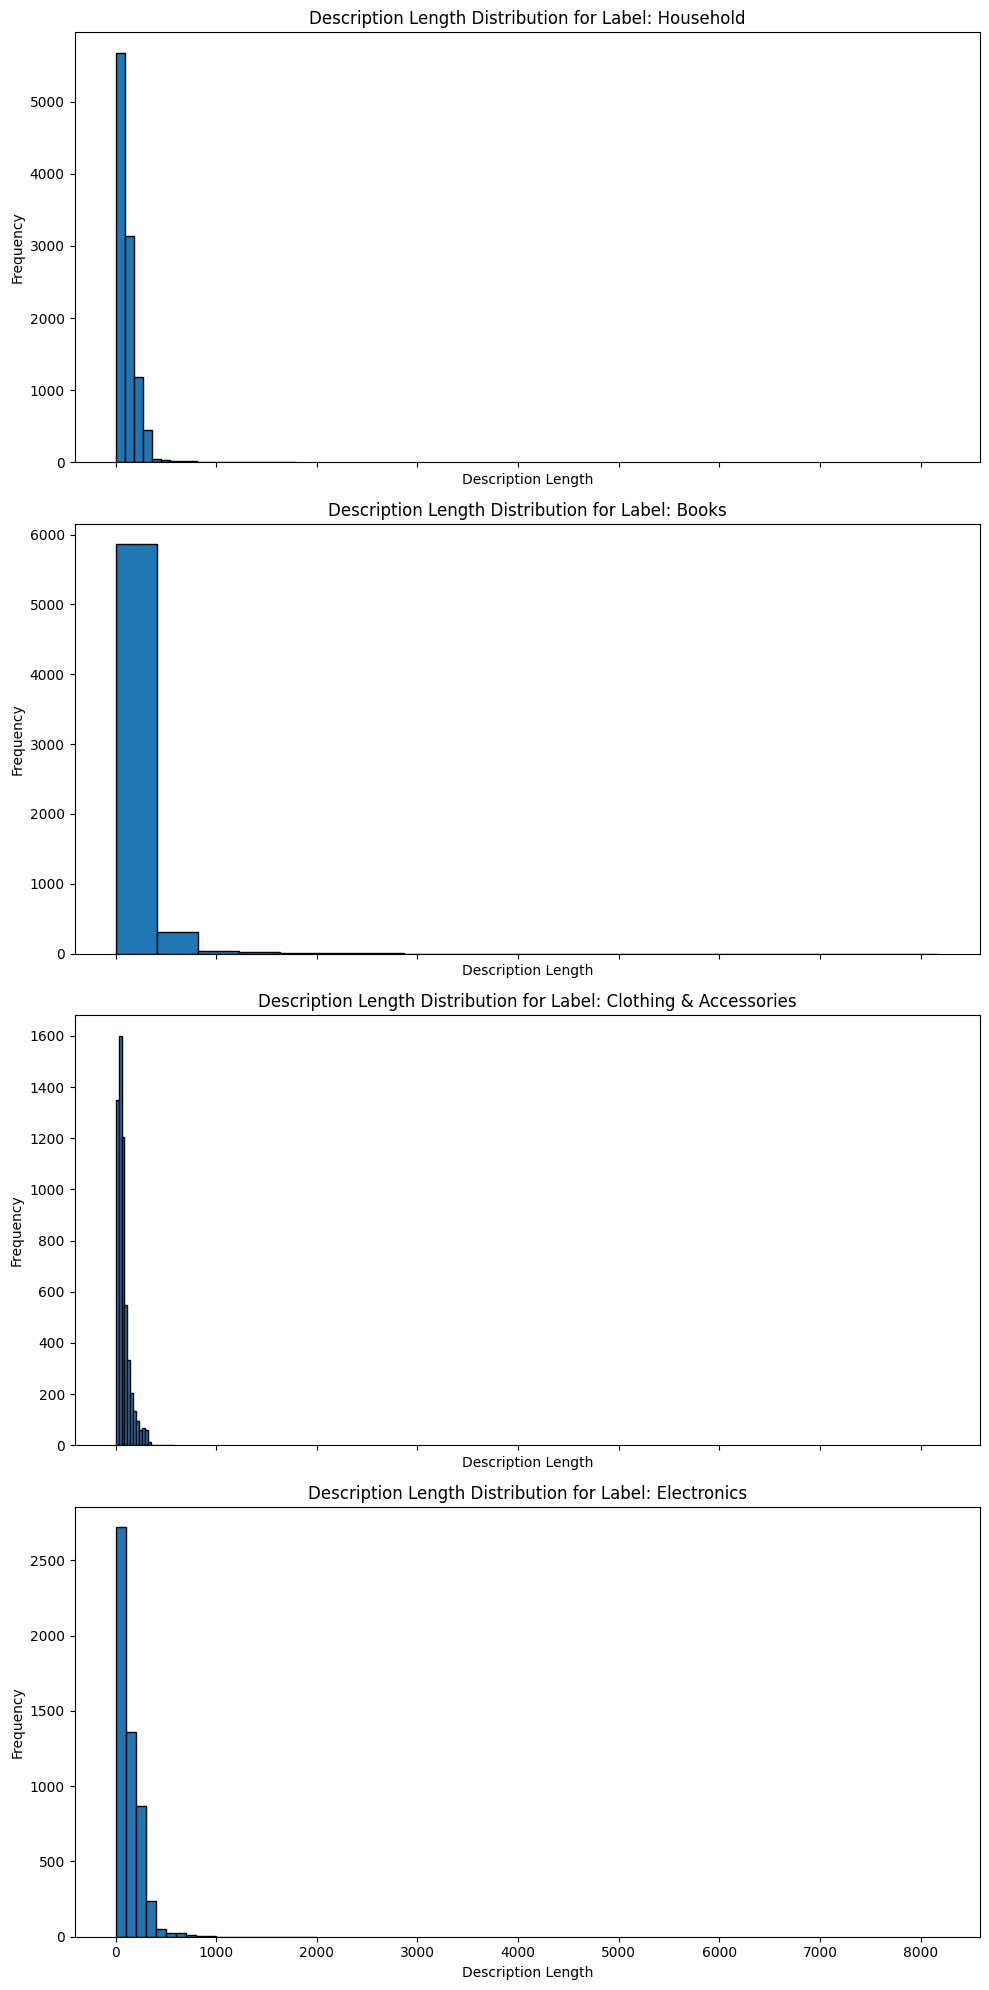

In [11]:
# Calculate the length of item_description for each row
df['description_length'] = df['item_description'].apply(lambda x: len(str(x).split()))

# Get the unique labels
labels = df['labels'].unique()

# Set up the figure and subplots
fig, axes = plt.subplots(len(labels), 1, figsize=(10, 5*len(labels)), sharex=True)

# Iterate over each label and plot the histogram
for i, label in enumerate(labels):
    # Filter the DataFrame for the current label
    label_df = df[df['labels'] == label]
    
    # Plot the histogram of description lengths
    axes[i].hist(label_df['description_length'], bins=20, edgecolor='black')
    axes[i].set_title(f'Description Length Distribution for Label: {label}')
    axes[i].set_xlabel('Description Length')
    axes[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

Outliers clearly present, let's identify and remove those

In [12]:
df.description_length.describe()

count    27802.000000
mean       111.886915
std        166.116128
min          1.000000
25%         34.000000
50%         76.000000
75%        146.000000
max       8181.000000
Name: description_length, dtype: float64

In [13]:
grouped_stats = df.groupby('labels')['description_length'].describe()
grouped_stats

count        mean         std  min    25%   50%  \
labels                                                                      
Books                    6256.0  139.979380  297.690124  1.0  12.00  73.0   
Clothing & Accessories   5674.0   72.629186   62.837255  1.0  31.00  56.0   
Electronics              5308.0  130.456104  123.790916  1.0  41.75  97.0   
Household               10564.0  107.005869   94.009244  1.0  44.00  84.0   

                          75%     max  
labels                                 
Books                   169.0  8181.0  
Clothing & Accessories   91.0   581.0  
Electronics             191.0  1997.0  
Household               143.0  1791.0

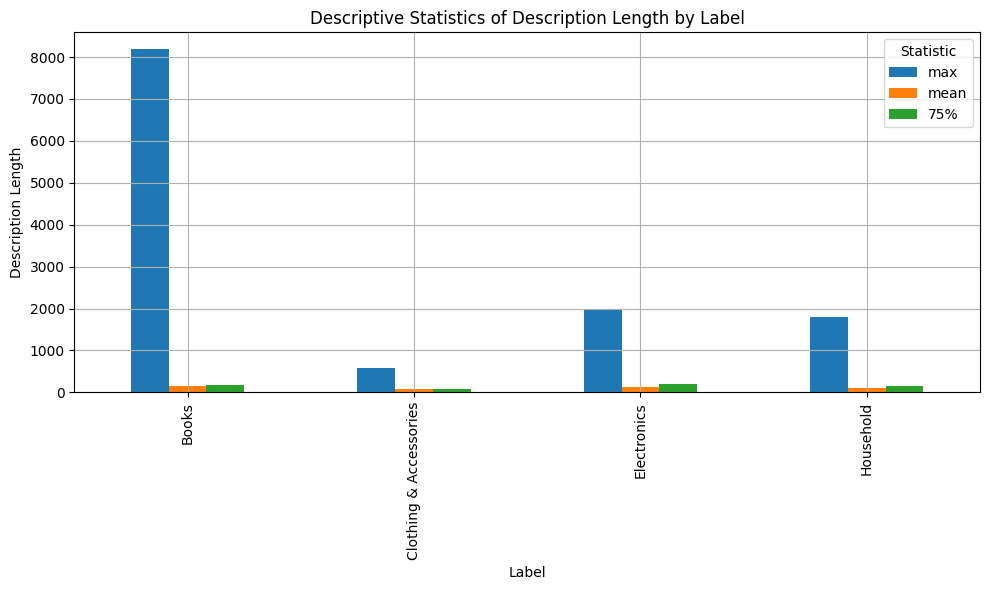

In [14]:
grouped_stats = df.groupby('labels')['description_length'].describe()

# Plot statistics for each label
fig, ax = plt.subplots(figsize=(10, 6))
grouped_stats.loc[:, ['max', 'mean', '75%']].plot(kind='bar', ax=ax)

# Customize plot
ax.set_xlabel('Label')
ax.set_ylabel('Description Length')
ax.set_title('Descriptive Statistics of Description Length by Label')
ax.legend(title='Statistic')
ax.grid(True)

plt.tight_layout()
plt.show()

There are some high outliers
* 75% of the total data (not broken out by labels) has a mean 'description_length' of 146 characters
* In Books, max is 8k+ characters, but 75% of the 'description_length' is 169 characters long. 
* Remove all outliers to get more realistic view of the data 

In [15]:
df.shape

(27802, 3)

Remove outliers based on 'description_length', identified within each unique label

(26464, 3)


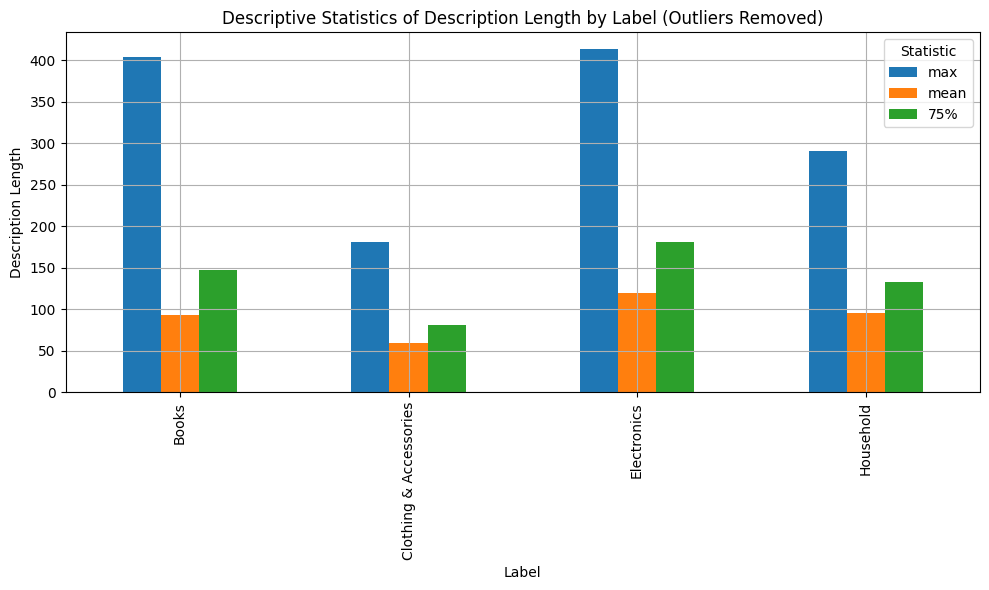

In [16]:
"""
    Remove outliers
        - IQR method
        - Z-Score
            - calculates the mean and std, and removes based on threshold
        - Percentile
        - Median Absolute Deviation
        - Isolation Forest
            - identifies anomalies or outliers by randomly selecting a feature and a split value to isolate data points recursively until each point is isolated. 
            
"""

def remove_outliers(df, column, labels):
    df_cleaned = pd.DataFrame()
    
    for label in labels:
        df_label = df[df['labels'] == label]
        
        Q1 = df_label[column].quantile(0.25)
        Q3 = df_label[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_cleaned = pd.concat([df_cleaned, df_label[(df_label[column] >= lower_bound) & (df_label[column] <= upper_bound)]])
    
    return df_cleaned

# Assuming your DataFrame is named 'df' and has columns 'labels' and 'description_length'
labels = df['labels'].unique()
df_cleaned = remove_outliers(df, 'description_length', labels)

print(df_cleaned.shape)

# Plot statistics for each label after removing outliers
grouped_stats = df_cleaned.groupby('labels')['description_length'].describe()

fig, ax = plt.subplots(figsize=(10, 6))
grouped_stats.loc[:, ['max', 'mean', '75%']].plot(kind='bar', ax=ax)

# Customize plot
ax.set_xlabel('Label')
ax.set_ylabel('Description Length')
ax.set_title('Descriptive Statistics of Description Length by Label (Outliers Removed)')
ax.legend(title='Statistic')
ax.grid(True)

plt.tight_layout()
plt.show()

~1,400 outliers removed

* Electronics has the longest item_descriptions. We know this when looking on Amazon and you'll notice sellers using long descriptions in tech to maximize SEO.
* Books has 2nd highest item_descriptions
* Then Household
* Lastly Clothing & Accessories

<a id="Section-one" ></a>
## Word Clouds

To analyze most frequently used words per class label

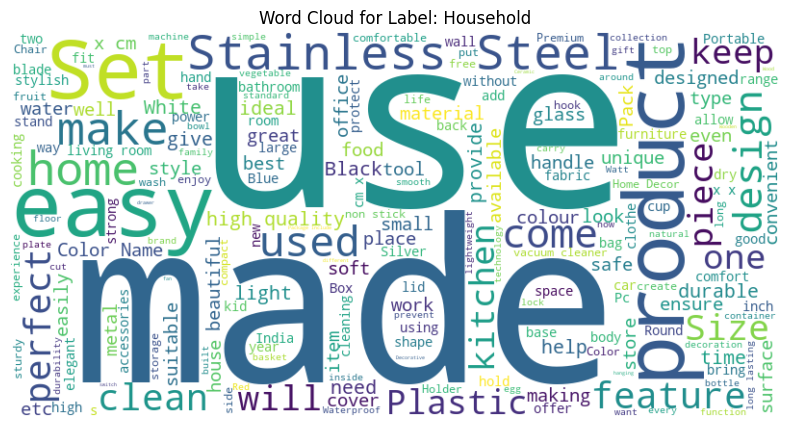

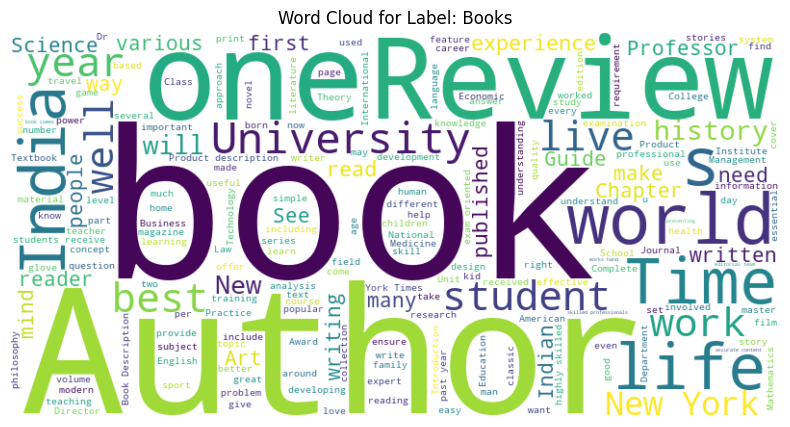

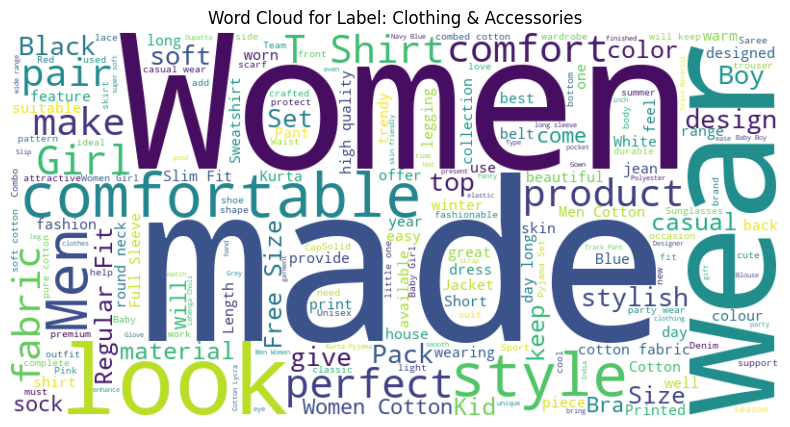

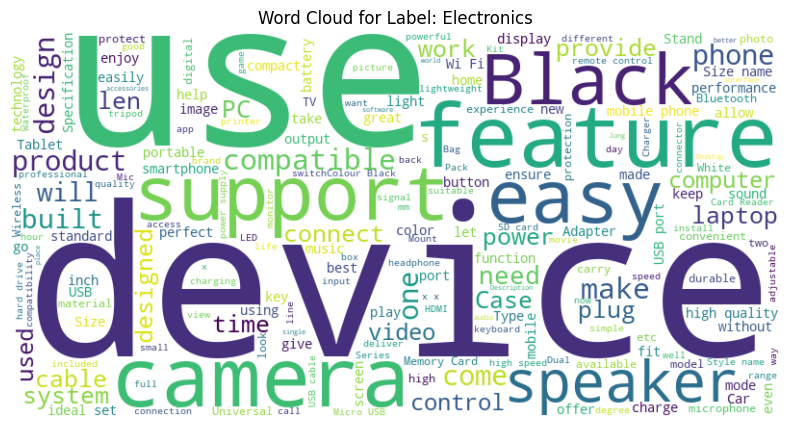

In [17]:
from wordcloud import WordCloud

df = df_cleaned

# Get the unique labels
labels = df['labels'].unique()

# Create word clouds for each label
for label in labels:
    # Filter the dataset for the current label
    label_df = df[df['labels'] == label]
    
    # Combine all the text for the current label
    text = ' '.join(label_df['item_description'])
    
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label: {label}')
    plt.show()

In [ ]:
"""
    Create a vocab of unique words and analyze size and frequency distribution of words
        - plot frequency graph (log-log plot) to examine distribution 
"""



In [18]:
"""
    Sentiment Analysis
        - visualize with histogram or pie chart
"""

from nltk.sentiment import SentimentIntensityAnalyzer

# Download the required NLTK data (you only need to run this once)
import nltk
#nltk.download('vader_lexicon')

# Create an instance of the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each item description
def get_sentiment_scores(description):
    sentiment_scores = sia.polarity_scores(description)
    return sentiment_scores['compound']

# Apply the sentiment analysis function to each item description
df['sentiment_score'] = df['item_description'].apply(get_sentiment_scores)

# Group the data by label and calculate the mean sentiment score for each label
sentiment_by_label = df.groupby('labels')['sentiment_score'].mean()

print("Sentiment Analysis Results:")
print(sentiment_by_label)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Sentiment Analysis Results:
labels
Books                     0.442328
Clothing & Accessories    0.645089
Electronics               0.589720
Household                 0.651504
Name: sentiment_score, dtype: float64


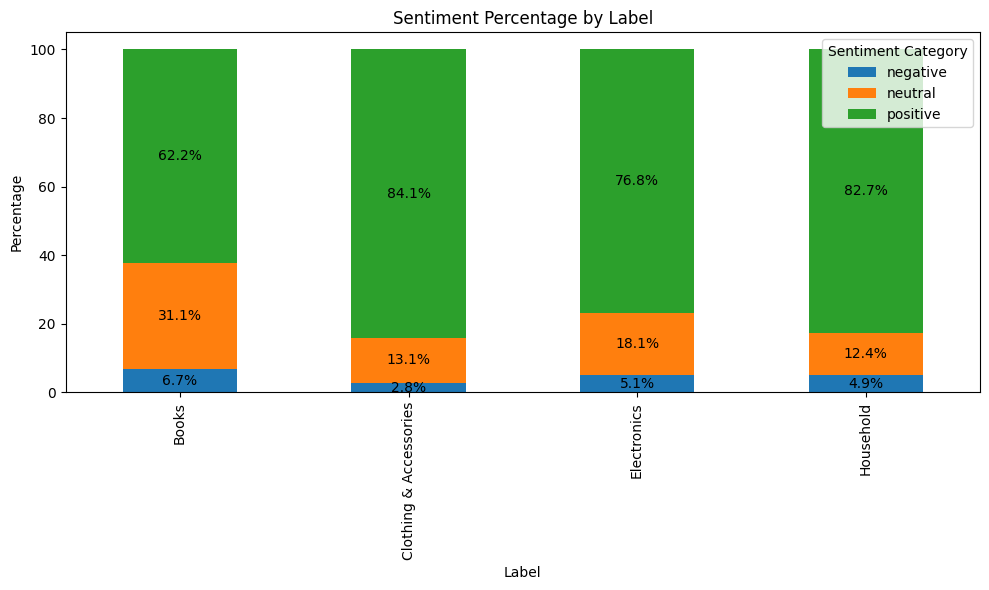

In [19]:
negative_threshold = -0.05
positive_threshold = 0.05

def categorize_sentiment(score):
    if score < negative_threshold:
        return 'negative'
    elif score > positive_threshold:
        return 'positive'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

sentiment_percentage = df.groupby(['labels', 'sentiment_category']).size().unstack(fill_value=0)
sentiment_percentage = sentiment_percentage.apply(lambda x: x / x.sum() * 100, axis=1)

# Create a stacked bar plot
ax = sentiment_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
ax.set_xlabel('Label')
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Percentage by Label')
ax.legend(title='Sentiment Category')

# Add percentage labels to each bar
for i in range(len(sentiment_percentage)):
    bar_bottom = 0
    for j in range(len(sentiment_percentage.columns)):
        bar_height = sentiment_percentage.iloc[i, j]
        if bar_height > 0:
            ax.text(i, bar_bottom + bar_height / 2, f'{bar_height:.1f}%', ha='center', va='center')
        bar_bottom += bar_height

plt.tight_layout()
plt.show()

In [20]:
"""
    Topic Modeling
        - Latent Dirichlet Allocation (LDA) or Non-negative Matrix Factorization (NMF):
                - to discover latent topics in the text data
"""

from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase and tokenize
    tokens = simple_preprocess(text, deacc=True)
    # Remove stopwords
    tokens = [token for token in tokens if token not in STOPWORDS]
    return tokens

# Apply preprocessing to item_description
df['processed_description'] = df['item_description'].apply(preprocess_text)

# Create a dictionary and corpus
dictionary = corpora.Dictionary(df['processed_description'])
corpus = [dictionary.doc2bow(text) for text in df['processed_description']]

# Train the LDA model
num_topics = 5  # Specify the number of topics you want to discover
lda_model = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the topics and their top words
print("Topics:")
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx+1}: {topic}")

# Perform topic modeling for each category
for label in df['labels'].unique():
    print(f"\nTopic Modeling for Label: {label}")
    label_df = df[df['labels'] == label]
    label_corpus = [dictionary.doc2bow(text) for text in label_df['processed_description']]
    label_lda_model = models.LdaMulticore(corpus=label_corpus, id2word=dictionary, num_topics=num_topics)
    
    print("Topics:")
    for idx, topic in label_lda_model.print_topics(num_topics=num_topics, num_words=10):
        print(f"Topic {idx+1}: {topic}")

Topics:
Topic 1: 0.005*"size" + 0.005*"cotton" + 0.005*"quality" + 0.005*"easy" + 0.004*"high" + 0.004*"color" + 0.004*"black" + 0.004*"product" + 0.004*"use" + 0.003*"pack"
Topic 2: 0.010*"camera" + 0.008*"mm" + 0.006*"lens" + 0.006*"usb" + 0.005*"size" + 0.005*"black" + 0.005*"phone" + 0.005*"bluetooth" + 0.004*"audio" + 0.004*"gb"
Topic 3: 0.005*"easy" + 0.005*"use" + 0.004*"power" + 0.003*"light" + 0.003*"time" + 0.003*"car" + 0.003*"book" + 0.003*"wall" + 0.003*"product" + 0.003*"home"
Topic 4: 0.005*"set" + 0.005*"power" + 0.005*"high" + 0.005*"use" + 0.005*"design" + 0.004*"black" + 0.004*"size" + 0.004*"women" + 0.004*"perfect" + 0.004*"quality"
Topic 5: 0.007*"author" + 0.006*"book" + 0.003*"new" + 0.003*"home" + 0.003*"power" + 0.003*"set" + 0.003*"product" + 0.003*"books" + 0.003*"best" + 0.002*"years"

Topic Modeling for Label: Household
Topics:
Topic 1: 0.008*"color" + 0.008*"cm" + 0.007*"light" + 0.007*"set" + 0.005*"home" + 0.005*"easy" + 0.005*"use" + 0.004*"steel" + 0.

In [21]:
df.head()

item_description  \
0  Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing te...   
1                                                                                                                                                                                                                                                               SAF 'Floral' Framed Painting (Wood, 30 inch x 10 inch, Special Effect UV Print Textured, SAO297) Painting made up in synthetic frame with UV textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch (A perfect gift for your special ones).   
2  SAF 'UV Textured Modern Art Print Framed' Painting (Synthetic, 35 cm x 50 cm x 3 cm, Set of 3) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 3 cm   Overview a beautiful painting involves the action or skill of using paint in the right manner; hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the SAF wood matte abstract painting with frame is quit...   
3  SAF Flower Print Framed Painting (Synthetic, 13.5 inch x 22 inch, UV Textured, Set of 3, SANFSW4951) Color:Multicolor                                                                                 |                            Size:35 cm x 50 cm x 2 cm   A beautiful painting involves the action or skill of using paint in the right manner, hence, the end product will be a picture that can speak a thousand words they say. Arts have been in trend for quite some time now. It can give different viewer different meanings style and design the saf wood matte painting with frame is quite abstract a...   
4  Incredible Gifts India Wooden Happy Birthday Unique Personalized Gift (5 X 4 Inch) Size:4 x 5   Made Of Natural Imported Wood, Which Is Quite Solid With Light Particle Pattern & Is Soft Pale To Blond Colour. Your Uploaded Photo Will Look Amazing And Beautiful After Laser Engraving On It. This Is One Of The Most Popular Unique Gifts In Our Store. We Offer This In Multiple Sizes, Some Can Be Used As Table Top And The Big Sizes Can Be Used As Wall Hanging Which Just Blends With Your Home Decaration. You Just Need To Upload A Picture And Add Your Own Text And We Will Do The Rest For You. We Wi...   

      labels  description_length  sentiment_score sentiment_category  \
0  Household                 228           0.9853           positive   
1  Household                  59           0.9665           positive   
2  Household                 224           0.9747           positive   
3  Household                 184           0.9738           positive   
4  Household                 184           0.9800           positive   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

# DataLoader

this normalizes and tokenizes automatically, right? 

In [22]:
df.shape

(26464, 6)

In [23]:
"""    
    Now that null values and outliers have been removed, we can put into Datasets --> DataLoaders 
            - normalize
            - tokenize
            - model
            - evaluate
"""

dls = TextDataLoaders.from_df(df, 
                              text_col='item_description', 
                              label_col='labels', 
                              valid_pct=0.2, 
                              seed=42)

In [24]:
dls.show_batch(max_n=2)

# Model 1

In [25]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

At epoch 2, there is slight overfitting, and by epoch 3 you can clearly see the model is overfitting. Let's try and counter that by increasing the regularization with the drop_mult param and adding weight decay to add a penalty term to the loss function, discouraging large weights. 

We can also use data augmentation techniques like synonym replacement, random word swaps, or back-translation. 

Can also use learn.cross_validation(4, 1e-2) to provide a more reliable estimate of the model's performance.

# Model 1b w/ Regularization and Weight Decay

In [26]:
learn_b = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.7, metrics=accuracy)
learn_b.fine_tune(4, 1e-2, wd=1e-4)

In [27]:
text = "stainless steel bowl with electronic mixer."
predictions = learn.predict(text)
print(predictions[0])  # Predicted label
print(predictions[2])  # Raw outputs (probabilities)

Books
tensor([0.9073, 0.0016, 0.0508, 0.0402])


In [28]:
text = "iphone 14 with lightning charger."
predictions = learn.predict(text)
print(predictions[0])  # Predicted label
print(predictions[2])  # Raw outputs (probabilities)

Books
tensor([0.9217, 0.0011, 0.0503, 0.0269])


In [29]:
import torch.nn.functional as F

text = "House plant that hangs from ceiling."
predictions = learn.predict(text)

raw_outputs = predictions[2]
probabilities = F.softmax(raw_outputs, dim=0)

print(predictions[0])
print("Probabilities:", probabilities)

Books
Probabilities: tensor([0.4302, 0.1822, 0.1834, 0.2042])


# Evaluation

In [30]:
# Get predictions and targets
preds, targets = learn.get_preds()

# Convert predictions and targets to class labels
preds_labels = preds.argmax(dim=1)
targets_labels = targets

# Compute classification report
report = classification_report(targets_labels, preds_labels)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1181
           1       0.96      0.96      0.96      1016
           2       0.94      0.90      0.92      1054
           3       0.92      0.95      0.93      2041

    accuracy                           0.94      5292
   macro avg       0.94      0.94      0.94      5292
weighted avg       0.94      0.94      0.94      5292



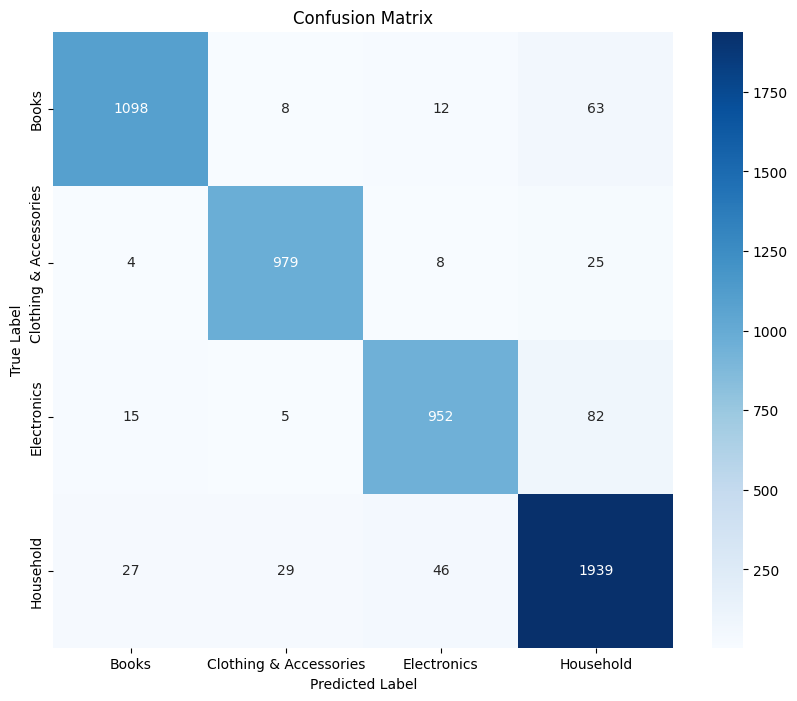

In [31]:
# Compute confusion matrix
cm = confusion_matrix(targets_labels, preds_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=learn.dls.vocab[1], 
            yticklabels=learn.dls.vocab[1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Model 2: LinearSVC

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [33]:
# Split the data into features (item_description) and labels
X = df['item_description']
y = df['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

In [35]:
# Initialize the LinearSVC classifier
classifier = LinearSVC()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

LinearSVC()

In [36]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.96      0.94      0.95      1157
Clothing & Accessories       0.98      0.99      0.98      1021
           Electronics       0.96      0.94      0.95      1083
             Household       0.95      0.97      0.96      2032

              accuracy                           0.96      5293
             macro avg       0.96      0.96      0.96      5293
          weighted avg       0.96      0.96      0.96      5293



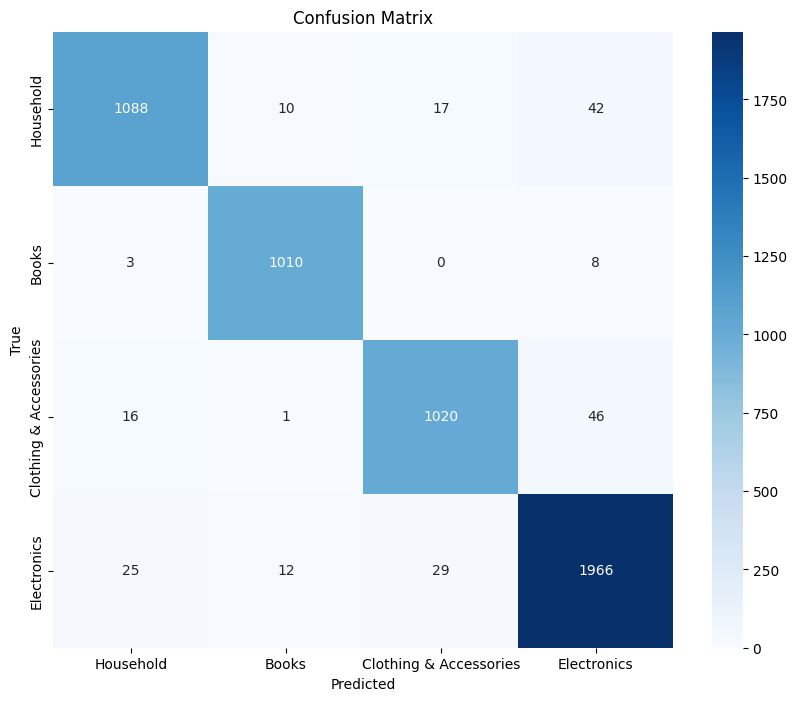

In [37]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
class_labels = df['labels'].unique()

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Model 3: MultinomialNB

In [38]:
# Initialize the MultinomialNB classifier
"""
Model Parameters:
    'alpha=' controls smoothing:
      - Smoothing helps to handle cases where a particular feature or word has not occurred in the training data for a specific class. 
      - smaller values = less smoothing
      - default is 1

"""
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [39]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.97      0.89      0.93      1157
Clothing & Accessories       0.97      0.95      0.96      1021
           Electronics       0.97      0.84      0.90      1083
             Household       0.86      0.97      0.91      2032

              accuracy                           0.92      5293
             macro avg       0.94      0.91      0.92      5293
          weighted avg       0.93      0.92      0.92      5293



# Model 4: RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [41]:
# Initialize the Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [42]:
# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.94      0.93      0.93      1157
Clothing & Accessories       0.97      0.97      0.97      1021
           Electronics       0.95      0.85      0.89      1083
             Household       0.90      0.95      0.93      2032

              accuracy                           0.93      5293
             macro avg       0.94      0.92      0.93      5293
          weighted avg       0.93      0.93      0.93      5293



# Model 5: MLPClassifier (a Neural Net)

In [43]:
from sklearn.neural_network import MLPClassifier

"""
    Multi-Layer Perceptron Classifier --> a feed forward Neural Network model
        - 1 or more hidden layers of artificial neurons (aka perceptrons)
        - each neuron in the layer uses a non-linear activiation function to process its inputs and produce an output
        - the outputs from the neurons in one layer serve as inputs to the neurons in the next layer
        - final layer (aka output layer) produces the classification results
        - supports both binary and multiclass classifiaction
"""

# Create an instance of MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Train the classifier
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

                 Books       0.96      0.94      0.95      1157
Clothing & Accessories       0.98      0.99      0.98      1021
           Electronics       0.96      0.92      0.94      1083
             Household       0.95      0.96      0.95      2032

              accuracy                           0.96      5293
             macro avg       0.96      0.95      0.96      5293
          weighted avg       0.96      0.96      0.96      5293



# Conclusion